In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename == 'models':
            print("MODELS")
        #print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [76]:
pth = '/kaggle/input/face-expression-recognition-dataset/images/'
classes = os.listdir(pth +'images/train')
num_classes = len(classes)

# def fix_dir(par_dir):
#     for dirname, _, filenames in os.walk(par_dir):
#         for filename in filenames:
#             old_pth = os.join(dirname,filename)
#             os.rename(old_pth, new_pth) #move file
        
# fix_dir(pth + "validation")
# fix_dir(pth + "train")

classes

['neutral', 'sad', 'disgust', 'happy', 'fear', 'surprise', 'angry']

In [77]:
from fastai.vision import *

In [78]:
np.random.seed(0)
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.1)

# data = (ImageList.from_folder(pth)
#         .split_by_rand_pct()
#         .label_from_folder()
#         .transform(tfms, size=48)
#         .databunch().normalize()) 

data = ImageDataBunch.from_folder(pth,valid='validation', ds_tfms = tfms, size = 300).normalize(imagenet_stats)

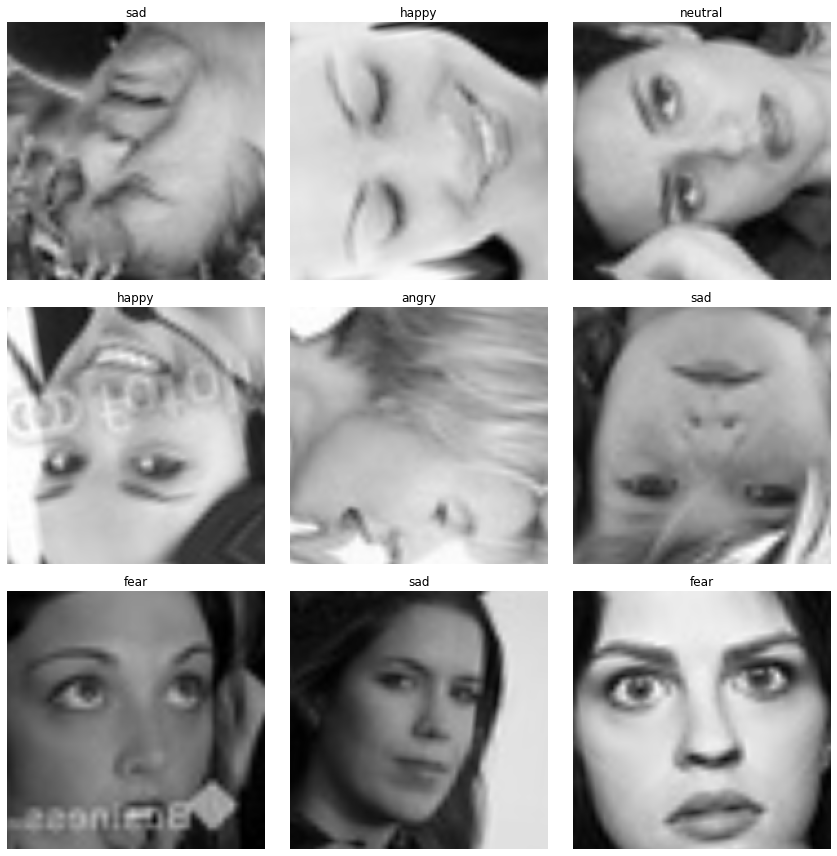

In [79]:
data.show_batch(rows=3, fig_size = (10,10))

In [119]:
learn = cnn_learner(data=data, base_arch=models.resnet101, model_dir='/kaggle/working/models')
learn.apply_dropout(0.7)

In [120]:
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


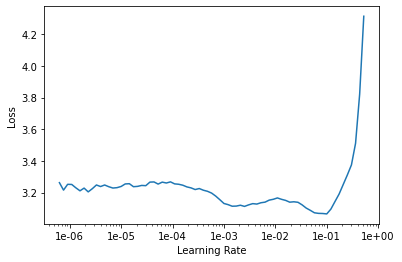

In [122]:
learn.recorder.plot()

In [129]:
lr = 1
learn.fit_one_cycle(10, 0.05) #10  0.01 + 10 slice(0.01) + 7 slice(0.001) best
learn.save('/kaggle/working/frozen')

epoch,train_loss,valid_loss,time
0,1.433512,1.343447,03:17
1,1.389220,1.369313,03:16


KeyboardInterrupt: 

In [ ]:
#learn.load('/kaggle/working/frozen')

learn.unfreeze()
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10,1e-05) # 5 +
#learn.save('/kaggle/working/unfreeze_final')

In [ ]:
learn.show_results()

In [126]:
#LABELS FIX for metrics
from torch import Tensor
from sklearn.preprocessing import OneHotEncoder

def ohe_fastai_lbls(lbls):
    ohe = OneHotEncoder()
    lbls = np.array(lbls).reshape(-1,1)
    ohe.fit(lbls)
    return Tensor(ohe.transform(lbls).toarray())

#Calculate metrics
train_prdctns, train_lbls = learn.get_preds(ds_type = DatasetType.Train)
valid_prdctns, valid_lbls = learn.get_preds()

train_lbls = ohe_fastai_lbls(train_lbls)
valid_lbls = ohe_fastai_lbls(valid_lbls)

print("train accuracy " + str(accuracy_thresh(train_prdctns, train_lbls)))
print("validation accuracy " + str(accuracy_thresh(valid_prdctns, valid_lbls)))

print("\ntrain fbeta " + str(fbeta(train_prdctns, train_lbls)))
print("valid fbeta " + str(fbeta(valid_prdctns, valid_lbls)))

train accuracy tensor(0.1429)
validation accuracy tensor(0.1429)

train fbeta tensor(0.4545)
valid fbeta tensor(0.4545)


In [127]:
1-(train_prdctns - train_lbls).sum().sqrt()*2

tensor(nan)

In [ ]:
learn.save('/kaggle/working/unfreeze_final')

In [ ]:
os.listdir("/kaggle/input/face-expression-recognition-dataset/images/train")

Total training data 28821
Total test data 7066


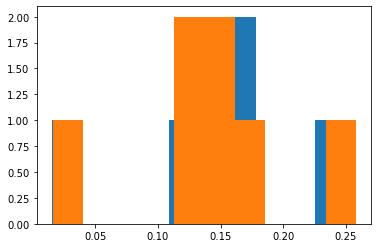

In [98]:
import matplotlib.pyplot as plt
classes = os.listdir(pth +'images/train')

train_classes = [len(os.listdir(pth + "/train/" + cls)) for cls in classes]
test_classes = [len(os.listdir(pth + "/validation/" + cls)) for cls in classes]

print("Total training data " + str(sum(train_classes)))
print("Total test data " + str(sum(test_classes)))

train_classes = np.array(train_classes)/sum(train_classes)
test_classes = np.array(test_classes)/sum(test_classes)


plt.hist(train_classes)
plt.hist(test_classes)

plt.show()